Source: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset?resource=download

Data set name: Heart Disease Health Indicators Dataset

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import AdaBoostClassifier


## Import Data

In [3]:
pathName = 'heart_disease_health_indicators_BRFSS2015.csv'
df = pd.read_csv(pathName)

In [4]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Columns

In [5]:
cols = df.columns
print(len(cols))
print(cols)

22
Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


### Rows

In [6]:
print(len(df))

253680


In [7]:
df_positive = df[df['HeartDiseaseorAttack'] == 1.0]
print(len(df_positive))

23893


In [8]:
df_negative = df[df['HeartDiseaseorAttack'] == 0.0]
print(len(df_negative))

229787


In [9]:
pos_ratio = len(df_positive)/len(df_negative)
print(pos_ratio)

0.10397890220073372


## Visualization

### Overview of correlation

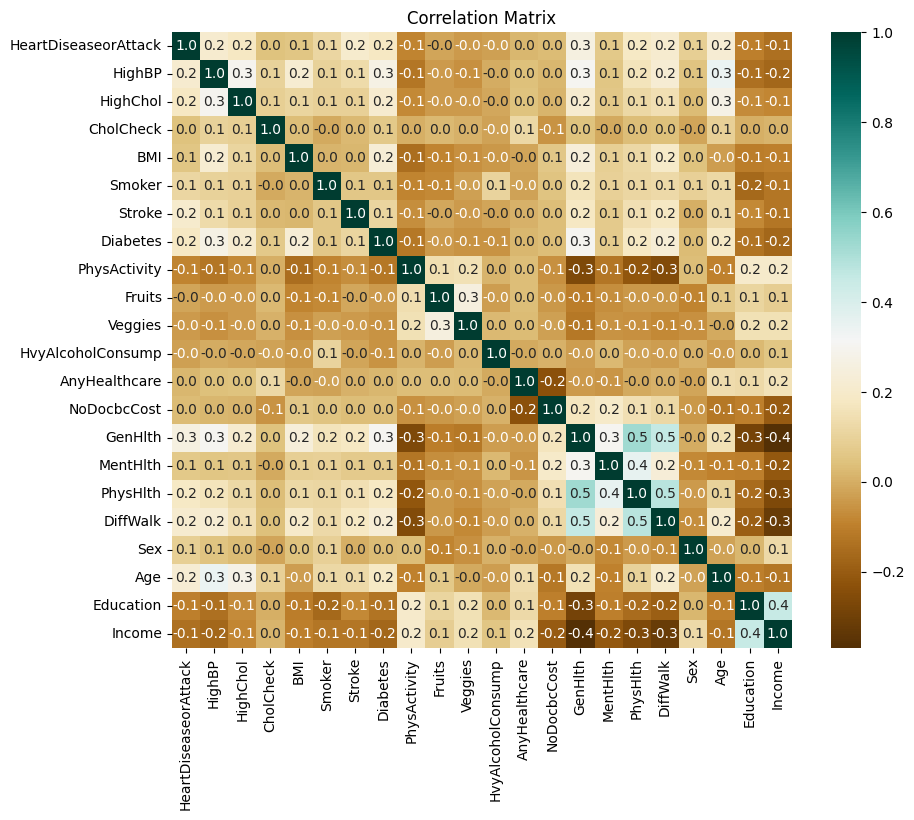

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.1f', cmap = 'BrBG')
plt.title("Correlation Matrix")
plt.show()

Observation: 

There are several columns that appear to have relatively higher correlation (magnitufe = 0.4): PhysHlth & GenHlth, DiffWalk & GenHlth, DiffWalk & PhysHlth, Education & Income, Income & GenHlth.

These corresponds our common knowledge.

Some of the columns have relatively higher correlation with our indicator label HeartDiseaseorAttack. We can look into those values further.

0.2-0.3: 'HighBP', 'HighChol', 'Stroke', 'Diabetes', 'GenHlth','PhysHlth', 'DiffWalk', 'Age'

0.1: 'BMI', 'Smoker', 'Stroke', 'PhysActivity', 'MentHlth', 'Sex', 'Age', 'Education'

### Categorical Data Analysis

In [11]:
# function to show the correlation between HeartDiseaseorAttack and other categorical columns
def cate_corr(col, color):
    new_df = (df.groupby(['HeartDiseaseorAttack']))[col].value_counts(normalize=True).mul(100).reset_index(name = "percentage")
    print(new_df)
    
    plt.figure(figsize=(3,3))
    sns.barplot(x = "HeartDiseaseorAttack", y = "percentage", hue = col, data = new_df, color = color).set_title(col + " vs Heart Disease")
    sns.set_style("whitegrid")
    


#### HighBP

   HeartDiseaseorAttack  HighBP  percentage
0                   0.0     0.0   60.441191
1                   0.0     1.0   39.558809
2                   1.0     1.0   75.034529
3                   1.0     0.0   24.965471


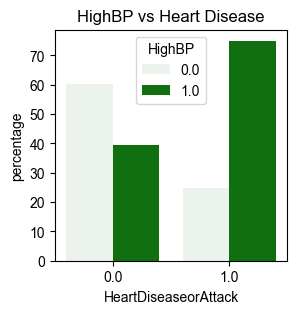

In [12]:
cate_corr('HighBP', 'green')

#### Stroke

   HeartDiseaseorAttack  Stroke  percentage
0                   0.0     0.0   97.234395
1                   0.0     1.0    2.765605
2                   1.0     0.0   83.522371
3                   1.0     1.0   16.477629


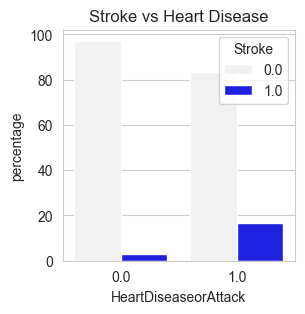

In [13]:
cate_corr('Stroke', 'blue')

#### Diabetes

   HeartDiseaseorAttack  Diabetes  percentage
0                   0.0       0.0   86.319940
1                   0.0       2.0   11.953679
2                   0.0       1.0    1.726381
3                   1.0       0.0   64.248943
4                   1.0       2.0   32.972000
5                   1.0       1.0    2.779057


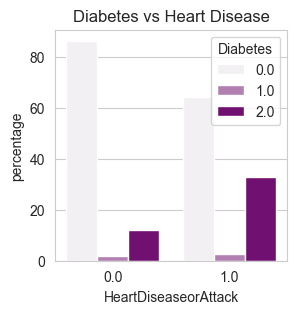

In [14]:
cate_corr('Diabetes', 'purple')

#### GenHlth

   HeartDiseaseorAttack  GenHlth  percentage
0                   0.0      2.0   36.971630
1                   0.0      3.0   29.475993
2                   0.0      1.0   19.271325
3                   0.0      4.0   10.810881
4                   0.0      5.0    3.470170
5                   1.0      3.0   33.122672
6                   1.0      4.0   28.158875
7                   1.0      2.0   17.277027
8                   1.0      5.0   17.189135
9                   1.0      1.0    4.252291


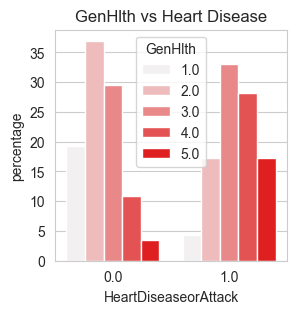

In [15]:
cate_corr('GenHlth', 'red')

Now take a look at a column with lower correaltion with HeartDiseaseorAttack

#### Smoker

   HeartDiseaseorAttack  Smoker  percentage
0                   0.0     0.0   57.516309
1                   0.0     1.0   42.483691
2                   1.0     1.0   61.947014
3                   1.0     0.0   38.052986


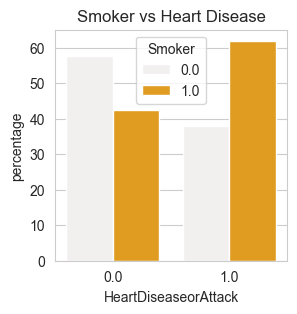

In [16]:
cate_corr('Smoker', 'orange')

The barplots gave us a very straight-forward visualization of the fact that the chance of getting heart disease probably have a positive correlation those columns we listed bfore. For example, there is a larger percentage of the group with heart disease that have Diabetes than the group with no heart disease.

## Data Mining

In [17]:
X = df[['HighBP', 'HighChol', 'Stroke', 'Diabetes', 'GenHlth','PhysHlth', 'DiffWalk', 'Age', 'BMI', 'Smoker', 'Stroke', 'PhysActivity', 'MentHlth', 'Sex', 'Age', 'Education']]
X.head()

,HighBP,HighChol,Stroke,Diabetes,GenHlth,PhysHlth,DiffWalk,Age,BMI,Smoker,Stroke,PhysActivity,MentHlth,Sex,Age,Education
0,1.0,1.0,0.0,0.0,5.0,15.0,1.0,9.0,40.0,1.0,0.0,0.0,18.0,0.0,9.0,4.0
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,25.0,1.0,0.0,1.0,0.0,0.0,7.0,6.0
2,1.0,1.0,0.0,0.0,5.0,30.0,1.0,9.0,28.0,0.0,0.0,0.0,30.0,0.0,9.0,4.0
3,1.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,27.0,0.0,0.0,1.0,0.0,0.0,11.0,3.0
4,1.0,1.0,0.0,0.0,2.0,0.0,0.0,11.0,24.0,0.0,0.0,1.0,3.0,0.0,11.0,5.0


In [32]:
y = df['HeartDiseaseorAttack']

### Split data into train and test set

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Decision tree baseline

In [89]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [90]:
clf.score(X_test, y_test)

0.8595770261747083

In [91]:
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=1)
cross_val_score(clf, X, y, cv=cv)

array([0.86029644, 0.86087788, 0.85952775, 0.85961645, 0.85987267])

We can use the corss validation result to get a more reliable analsis of the model.

The accuracy of the basic decision tree is about 0.86.

We can now visualize the result

### Confusion Matrix

<Figure size 500x500 with 0 Axes>

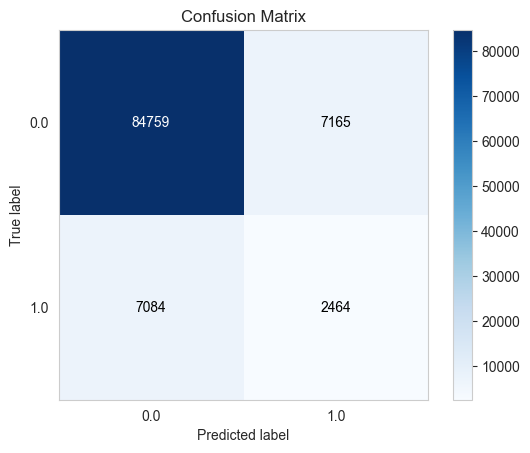

In [92]:
plt.figure(figsize=(5,5))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix')
plt.show()

### ROC

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

AUC: 0.597


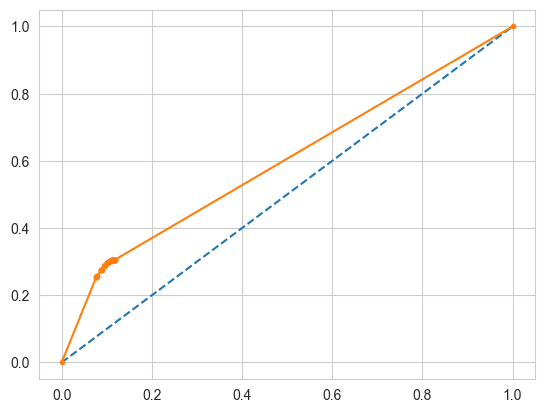

In [94]:
probs = clf.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

This is acutally a pretty bad AUC score.

In [36]:
learning_rate = 1.0
n_estimators = 100

ada_discrete = AdaBoostClassifier(
    estimator=clf,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME",
)
ada_discrete.fit(X_train, y_train)
y_pred = ada_discrete.predict(X_test)

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   n_estimators=100)

In [38]:
ada_discrete.score(X_test, y_test)

0.8807947019867549

The accuracy is increased a little bit